In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Basics of k-means clustering

### Why k-means clustering?
- A critical drawback of hierarchical clustering: runtime
- K means runs significantly faster on large datasets

### Step 1: Generate cluster centers
- kmeans(obs, k_or_guess, iter, thresh, check_finite)
 - obs : standardized observations
 - k_or_guess : number of clusters
 - iter : number of iterations (default: 20)
 - thres : threshold (default: 1e-05)
 - check_finite : whether to check if observations contain only finite numbers (default: True)
- Returns two objects: cluster centers, distortion
 - How is distortion calculated?
 - Distortion: sum of squares of distances of points from cluster centers

### Step 2: Generate cluster labels
- vq(obs, code_book, check_finite=True)
 - obs : standardized observations
 - code_book : cluster centers
 - check_finite : whether to check if observations contain only finite numbers (default: True)
- Returns two objects: a list of cluster labels, a list of distortions

### A note on distortions
- kmeans returns a single value of distortions
- vq returns a list of distortions. Average of them is approximately equal to a single distortion kmeans returns

### Running k-means

In [3]:
x_coordinates = [80.1, 93.1, 86.6, 98.5, 86.4, 9.5, 15.2, 3.4, 10.4, 20.3, 44.2, 56.8, 49.2, 62.5, 44.0]
y_coordinates = [87.2, 96.1, 95.6, 92.4, 92.4, 57.7, 49.4, 47.3, 59.1, 55.5, 25.6, 2.1, 10.9, 24.1, 10.3]

df = pd.DataFrame({'x_coordinate': x_coordinates, 
                   'y_coordinate': y_coordinates})

from scipy.cluster.vq import whiten
df['scaled_x'] = whiten(df['x_coordinate'])
df['scaled_y'] = whiten(df['y_coordinate'])

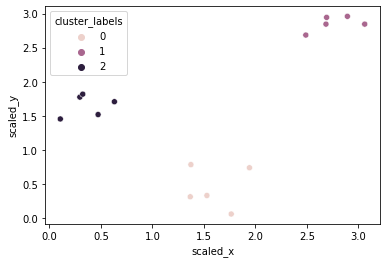

In [9]:
# Import kmeans and vq functions
from scipy.cluster.vq import kmeans, vq

# Generate cluster centers and labels
cluster_centers, _ = kmeans(df[['scaled_x', 'scaled_y']], 3)
df['cluster_labels'], _ = vq(df[['scaled_x', 'scaled_y']], cluster_centers)

# Plot clusters
sns.scatterplot(x='scaled_x', y='scaled_y', hue='cluster_labels', data=df)
plt.show()

### Exercise: K-means clustering: first exercise
This exercise will familiarize you with the usage of k-means clustering on a dataset. Let us use the Comic Con dataset and check how k-means clustering works on it.

Recall the two steps of k-means clustering:

Define cluster centers through kmeans() function. It has two required arguments: observations and number of clusters.
Assign cluster labels through the vq() function. It has two required arguments: observations and cluster centers.
The data is stored in a pandas DataFrame, comic_con. x_scaled and y_scaled are the column names of the standardized X and Y coordinates of people at a given point in time.

In [11]:
x_coordinate = [17, 20, 35, 14, 37, 33, 14, 30, 35, 17, 11, 21, 13, 10, 81, 84, 87, 83, 
                90, 97, 94, 88, 89, 93, 92, 82, 81, 92, 91, 22, 23, 25, 25, 27, 17, 17]
y_coordinate = [ 4,  6,  0,  0,  4,  3,  1,  6,  5,  4,  6, 10,  8, 10, 97, 94, 99, 95, 
                95, 97, 99, 99, 94, 99, 90, 98, 100, 93, 98, 15, 10,  0, 10,  7, 17, 15]

comic_con = pd.DataFrame({'x_coordinate': x_coordinate, 
                          'y_coordinate': y_coordinate})

from scipy.cluster.vq import whiten
comic_con['x_scaled'] = whiten(comic_con['x_coordinate'])
comic_con['y_scaled'] = whiten(comic_con['y_coordinate'])

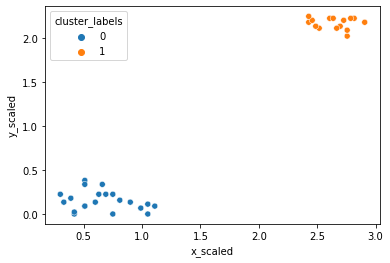

In [12]:
# Import the kmeans and vq functions
from scipy.cluster.vq import kmeans, vq

# Generate cluster centers
cluster_centers, distortion = kmeans(comic_con[['x_scaled', 'y_scaled']], 2)

# Assign cluster labels
comic_con['cluster_labels'], distortion_list = vq(comic_con[['x_scaled', 'y_scaled']], cluster_centers)

# Plot clusters
sns.scatterplot(x='x_scaled', y='y_scaled', 
                hue='cluster_labels', data = comic_con)
plt.show()

## How many clusters?

### How to find the right k?
- No absolute method to find right number of clusters (k) in k-means clustering
- Elbow method

### Distortions revisited
- Distortion: sum of squared distances of points from cluster centers
- Decreases with an increasing number of clusters
- Becomes zero when the number of clusters equals the number of points
- Elbow plot: line plot between cluster centers and distortion

### Elbow method in Python

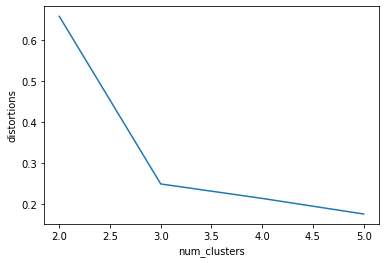

In [15]:
# Declaring variables for use
distortions = []
num_clusters = range(2, 6)

# Populating distortions for various clusters
for i in num_clusters:
    centroids, distortion = kmeans(df[['scaled_x', 'scaled_y']], i)
    distortions.append(distortion)

# Plotting elbow plot data
elbow_plot_data = pd.DataFrame({'num_clusters': num_clusters, 'distortions': distortions})
sns.lineplot(x='num_clusters', y='distortions', data=elbow_plot_data)
plt.show()

### Exercise: Elbow method on distinct clusters
Let us use the comic con data set to see how the elbow plot looks on a data set with distinct, well-defined clusters. You may want to display the data points before proceeding with the exercise.

The data is stored in a pandas DataFrame, comic_con. x_scaled and y_scaled are the column names of the standardized X and Y coordinates of people at a given point in time.

In [16]:
x_coordinate = [17, 20, 35, 14, 37, 33, 14, 30, 35, 17, 11, 21, 13, 10, 81, 84, 87, 83, 
                90, 97, 94, 88, 89, 93, 92, 82, 81, 92, 91, 22, 23, 25, 25, 27, 17, 17]
y_coordinate = [ 4,  6,  0,  0,  4,  3,  1,  6,  5,  4,  6, 10,  8, 10, 97, 94, 99, 95, 
                95, 97, 99, 99, 94, 99, 90, 98, 100, 93, 98, 15, 10,  0, 10,  7, 17, 15]

comic_con = pd.DataFrame({'x_coordinate': x_coordinate, 
                          'y_coordinate': y_coordinate})

from scipy.cluster.vq import whiten
comic_con['x_scaled'] = whiten(comic_con['x_coordinate'])
comic_con['y_scaled'] = whiten(comic_con['y_coordinate'])

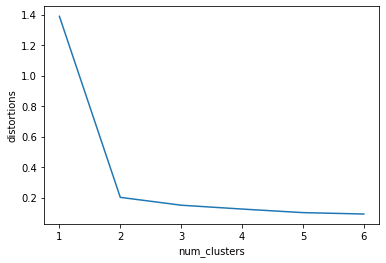

In [18]:
distortions = []
num_clusters = range(1, 7)

# Create a list of distortions from the kmeans function
for i in num_clusters:
    cluster_centers, distortion = kmeans(comic_con[['x_scaled', 'y_scaled']], i)
    distortions.append(distortion)

# Create a DataFrame with two lists - num_clusters, distortions
elbow_plot = pd.DataFrame({'num_clusters': num_clusters, 'distortions': distortions})

# Creat a line plot of num_clusters and distortions
sns.lineplot(x='num_clusters', y='distortions', data = elbow_plot)
plt.xticks(num_clusters)
plt.show()

### Exercise: Elbow method on uniform data
In the earlier exercise, you constructed an elbow plot on data with well-defined clusters. Let us now see how the elbow plot looks on a data set with uniformly distributed points. You may want to display the data points in the IPython Shell before proceeding with the exercise.

The data is stored in a pandas DataFrame, uniform_data. x_scaled and y_scaled are the column names of the standardized X and Y coordinates of points.

In [21]:
x_coordinate = [39, 42, 58, 43, 13, 32, 60, 13, 26, 27, 29, 51, 14, 50, 62, 
                59, 50, 62, 65, 17, 25, 45, 55, 48, 42, 58, 68, 58, 37, 55]
y_coordinate = [3, 7, 3, 3, 6, 5, 3, 4, 0, 9, 6, 3, 0, 7, 4, 
                1, 3, 0, 2, 5, 9, 5, 8, 6, 3, 1, 4, 2, 8, 7]

uniform_data = pd.DataFrame({'x_coordinate': x_coordinate, 
                             'y_coordinate': y_coordinate})

from scipy.cluster.vq import whiten
uniform_data['x_scaled'] = whiten(uniform_data['x_coordinate'])
uniform_data['y_scaled'] = whiten(uniform_data['y_coordinate'])

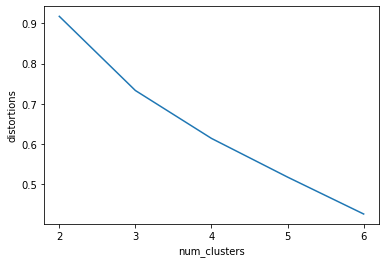

In [22]:
distortions = []
num_clusters = range(2, 7)

# Create a list of distortions from the kmeans function
for i in num_clusters:
    cluster_centers, distortion = kmeans(uniform_data[['x_scaled', 'y_scaled']], i)
    distortions.append(distortion)

# Create a DataFrame with two lists - num_clusters, distortions
elbow_plot = pd.DataFrame({'num_clusters': num_clusters, 'distortions': distortions})

# Creat a line plot of num_clusters and distortions
sns.lineplot(x='num_clusters', y='distortions', data = elbow_plot)
plt.xticks(num_clusters)
plt.show()

### Exercise: Impact of seeds on distinct clusters
You noticed the impact of seeds on a dataset that did not have well-defined groups of clusters. In this exercise, you will explore whether seeds impact the clusters in the Comic Con data, where the clusters are well-defined.

The data is stored in a pandas DataFrame, comic_con. x_scaled and y_scaled are the column names of the standardized X and Y coordinates of people at a given point in time.

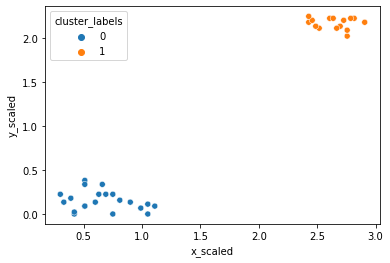

In [23]:
# Import random class
from numpy import random 

# Initialize seed
random.seed(0)

# Run kmeans clustering
cluster_centers, distortion = kmeans(comic_con[['x_scaled', 'y_scaled']], 2)
comic_con['cluster_labels'], distortion_list = vq(comic_con[['x_scaled', 'y_scaled']], cluster_centers)

# Plot the scatterplot
sns.scatterplot(x='x_scaled', y='y_scaled', 
                hue='cluster_labels', data = comic_con)
plt.show()

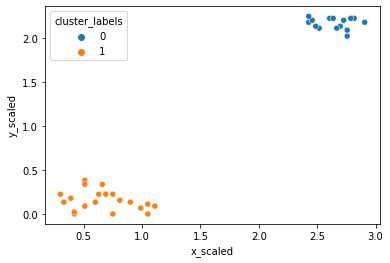

In [24]:
# Import random class
from numpy import random

# Initialize seed
random.seed([1, 2, 1000])

# Run kmeans clustering
cluster_centers, distortion = kmeans(comic_con[['x_scaled', 'y_scaled']], 2)
comic_con['cluster_labels'], distortion_list = vq(comic_con[['x_scaled', 'y_scaled']], cluster_centers)

# Plot the scatterplot
sns.scatterplot(x='x_scaled', y='y_scaled', 
                hue='cluster_labels', data = comic_con)
plt.show()

### Exercise: Uniform clustering patterns
Now that you are familiar with the impact of seeds, let us look at the bias in k-means clustering towards the formation of uniform clusters.

Let us use a mouse-like dataset for our next exercise. A mouse-like dataset is a group of points that resemble the head of a mouse: it has three clusters of points arranged in circles, one each for the face and two ears of a mouse.

Here is how a typical mouse-like dataset looks like (Source).

In [ ]:
# Import the kmeans and vq functions
from scipy.cluster.vq import kmeans, vq

# Generate cluster centers
cluster_centers, distortion = kmeans(mouse[['x_scaled', 'y_scaled']], 3)

# Assign cluster labels
mouse['cluster_labels'], distortion_list = vq(mouse[['x_scaled', 'y_scaled']], cluster_centers)

# Plot clusters
sns.scatterplot(x='x_scaled', y='y_scaled', 
                hue='cluster_labels', data = mouse)
plt.show()

You are correct! Notice that kmeans is unable to capture the three visible clusters clearly, and the two clusters towards the top have taken in some points along the boundary. This happens due to the underlying assumption in kmeans algorithm to minimize distortions which leads to clusters that are similar in terms of area.

### Exercise: FIFA 18: defenders revisited
In the FIFA 18 dataset, various attributes of players are present. Two such attributes are:

defending: a number which signifies the defending attributes of a player
physical: a number which signifies the physical attributes of a player
These are typically defense-minded players. In this exercise, you will perform clustering based on these attributes in the data.

The following modules have been pre-loaded: kmeans, vq from scipy.cluster.vq, matplotlib.pyplot as plt, seaborn as sns. The data for this exercise is stored in a pandas DataFrame, fifa. The scaled variables are scaled_def and scaled_phy.

In [25]:
fifa = pd.read_csv('fifa_18_sample_data.csv')
fifa['scaled_def'] = whiten(fifa['def'])
fifa['scaled_phy'] = whiten(fifa['phy'])

                scaled_def  scaled_phy
cluster_labels                        
0                 1.948298    7.163234
1                 3.817844    9.020452
2                 2.072803    9.066327


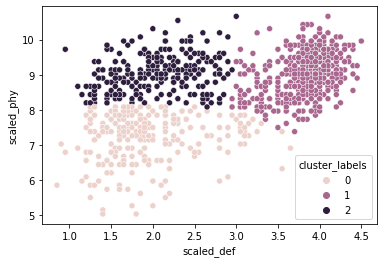

In [26]:
# Set up a random seed in numpy
random.seed([1000,2000])

# Fit the data into a k-means algorithm
cluster_centers,_ = kmeans(fifa[['scaled_def', 'scaled_phy']], 3)

# Assign cluster labels
fifa['cluster_labels'], _ = vq(fifa[['scaled_def', 'scaled_phy']], cluster_centers)

# Display cluster centers 
print(fifa[['scaled_def', 'scaled_phy', 'cluster_labels']].groupby('cluster_labels').mean())

# Create a scatter plot through seaborn
sns.scatterplot(x='scaled_def', y='scaled_phy', hue='cluster_labels', data=fifa)
plt.show()

You are right! Notice that the seed has an impact on clustering as the data is uniformly distributed.